In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 
# os.chdir('C:\\Users\\joeyb\\Documents\\Physics 359\\Hall')

In [19]:
def linear(V, m, b):
    return m*V + b

In [20]:
mv = (np.loadtxt('all_the_mv.csv', delimiter=',', skiprows = 1))

In [21]:
result = []
for sublist in mv:
    for item in sublist:
        result.append(item)
#print("\nCollapse nested lists:")
final_result = np.transpose(result)
# print(final_result)

TempArray = np.linspace(-270, 399, 670)

### Temp vs Voltage

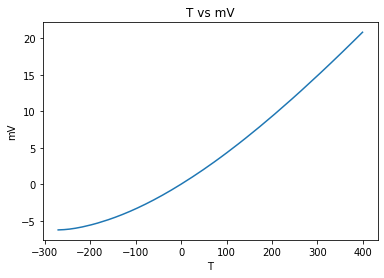

In [22]:
plt.plot(TempArray, final_result)
plt.title("T vs mV")
plt.xlabel('T')
plt.ylabel('mV')
plt.show()

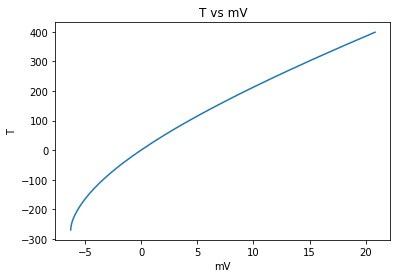

In [23]:
plt.plot(final_result, TempArray)
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.show()

### Trying with just taking linear approx on small scales

In [24]:
#splitting arrays in to 10 element arrays
mVArraysOf10 = np.split(final_result, len(final_result)/10)
TArraysOf10 = np.split(TempArray, len(final_result)/10)

for i in range(0, len(mVArraysOf10)):
    if (i != len(mVArraysOf10) - 1):
        mVArraysOf10[i] = np.append(mVArraysOf10[i], mVArraysOf10[i+1][0])
        TArraysOf10[i] = np.append(TArraysOf10[i], TArraysOf10[i+1][0])

    else:
        mVArraysOf10[i] = np.append(mVArraysOf10[i], mVArraysOf10[i-1][-1])
        TArraysOf10[i]= np.append(TArraysOf10[i], TArraysOf10[i-1][-1])


#get linear fit for each array of 10
fits = []

for i in range(0, int(len(final_result)/10)):
    popt, pcov = curve_fit(linear, mVArraysOf10[i], TArraysOf10[i])
    fits.append([popt, np.sqrt(np.diag(pcov))])
    
# print(fits[-1])
# perr = np.sqrt(np.diag(fits[0][0]))
# print(perr)

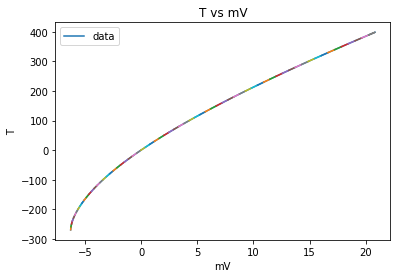

In [25]:
#plotting fits to make sure they match the data

plt.plot(final_result, TempArray, label="data")
plt.title("T vs mV")
plt.xlabel('mV')
plt.ylabel('T')
plt.legend()

for i in range(0, len(fits)):
    plt.plot(mVArraysOf10[i], linear(mVArraysOf10[i], fits[i][0][0], fits[i][0][1]))

plt.show()

## Errors
#### From Temp calibration  
LIMITS OF ERROR (whichever is greater)			
Standard	1.0Â°C or 0.75% Above 0Â°C	 1.0Â°C or 1.5% Below 0Â°C	
Special	0.5Â°C or 0.4%		
lets go with 1 degree for now

#### Model 199 DMM
? not sure how to read errors in manual

In [26]:

"""
Takes input voltage (mV) and outputs corresponding temperature (C)
Must be run with mVArraysOf10[] and fits[]
Need errors


"""
def getTempFromVolt(V):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1])
            fitted = True
            
            #need to get errors
#             fits[index][1][0], fits[index][1][1] + error on V
        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = 0
            break
    
    return TempVal

In [34]:
# Use function to get temp for a given V
V = -0.660
Temp = getTempFromVolt(V)
            
print("%f C" %Temp)

-17.388099 C


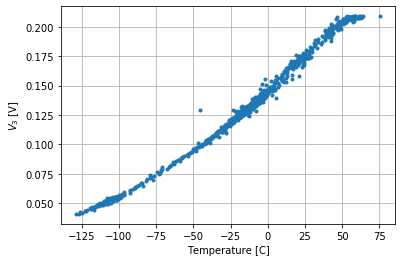

In [28]:
#plotting V4 vs temp to get big resistance as V=IR 

data1 = np.transpose((np.loadtxt('Data/2020-02-10 13_41 Voltage Readings Data.csv', delimiter=',', skiprows = 1)))
tempdata1 = [getTempFromVolt(V) for V in data1[7]*1e3]

plt.plot(tempdata1, data1[2], ls=" ", marker=".")

plt.grid()
plt.ylabel("$V_3$ [V]")
plt.xlabel("Temperature [C]")

plt.show()

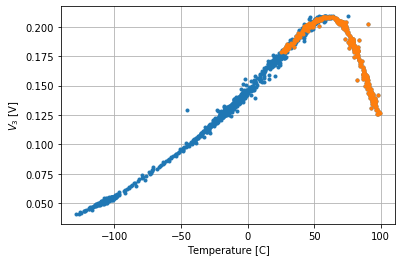

In [29]:
data = np.transpose((np.loadtxt('Data/2020-02-12 15_09 Voltage Readings Data_full.csv', delimiter=',', skiprows = 1)))
#need errors on data

# print(len(data1), len(data))

tempdata = [getTempFromVolt(V) for V in data[7]*1e3]

TempDataCom = tempdata1 + tempdata
# DataCom = np.vstack(data1 + data)
DataCom = [*data1[2], *data[2]]
# np.append(DataCom, data1[2])
# np.append(DataCom, data[2])
# np.concatenate

plt.plot(TempDataCom, DataCom, ls=" ", marker=".")
plt.plot(tempdata, data[2], ls=" ", marker=".")

plt.grid()
plt.ylabel("$V_3$ [V]")
plt.xlabel("Temperature [C]")

plt.show()

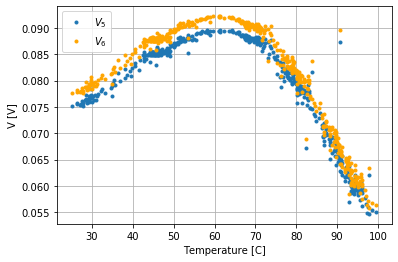

In [30]:
#plotting V5 and V6 vs temp to get better small resistance as V=IR 

# data = np.transpose((np.loadtxt('2020-02-10 13_41 Voltage Readings Data_try1.csv', delimiter=',', skiprows = 1)))
# tempdata = [getTempFromVolt(V) for V in data[7]*1e3]

plt.plot(tempdata, data[4], ls=" ", marker=".", label="$V_5$")
plt.plot(tempdata, data[5], ls=" ", marker=".", color="orange", label="$V_6$")

plt.grid()
plt.ylabel("V [V]")
plt.xlabel("Temperature [C]")
plt.legend()

plt.show()

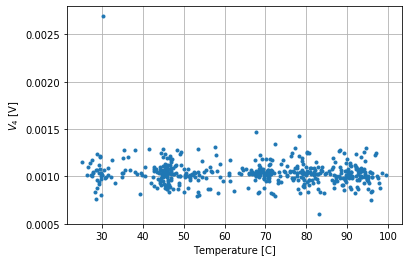

In [31]:
# I = V4/R, just for checking the current is actually 1 mA
#seems flat as expected

plt.plot(tempdata, data[3], ls=" ", marker=".")

plt.grid()
plt.ylabel("$V_4$ [V]")
plt.xlabel("Temperature [C]")

plt.show()